In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
up=files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
df=pd.read_csv("UCI_Credit_Card.csv")
print(df)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
df.rename(columns={"default.payment.next.month":"target"},inplace=True)
df.drop(columns=["ID", "Unnamed: 0"], errors="ignore", inplace=True)

In [ ]:
print(df.isnull().sum())
print("Shape",df.shape)

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64
Shape (30000, 24)


In [ ]:
df["avg_payment_delay"] = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].mean(axis=1)
df["total_Bill"]=df[[f"BILL_AMT{i}" for i in range(1,7)]].sum(axis=1)
df["avg_bill"]=df[[f"BILL_AMT{i}" for i in range(1,7)]].mean(axis=1)

In [ ]:
df["Total_paid"]=df[[f"PAY_AMT{i}" for i in range(1,7)]].sum(axis=1)
df["avg_paid"]=df[[f"PAY_AMT{i}" for i in range(1,7)]].mean(axis=1)

In [ ]:
df["repayment_ratio"]=df["Total_paid"]/df["total_Bill"]
df["repayment_ratio"]=df["repayment_ratio"].replace([np.inf, -np.inf], 0).fillna(0)

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]
print(X.head())
print(y.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  avg_payment_delay  \
0     -2  ...       0.0       0.0       0.0       0.0          -0.333333   
1      0  ...    1000.0    1000.0       0.0    2000.0           0.500000   
2      0  ...    1000.0    1000.0    1000.0    5000.0           0.000000   
3      0  ...    1200.0    1100.0    1069.0    1000.0           0.000000   
4      0  ...   10000.0    9000.0     689.0     679.0          -0.333333   

   total_Bill      avg_bill  Total_paid     avg_paid  repayment_ratio  
0      7704.0   1284

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
raf=RandomForestClassifier(n_estimators=100,random_state=42)
raf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
def evaluate(model, X_test, y_test, model_name, scaled=False):
    X_eval = X_test_scaled if scaled else X_test
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)[:, 1]

    print(f"\n🧪 {model_name} Performance")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")


🧪 Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

ROC-AUC: 0.7269

🧪 Decision Tree Performance
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4687
           1       0.39      0.40      0.39      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

ROC-AUC: 0.6124

🧪 Random Forest Performance
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   

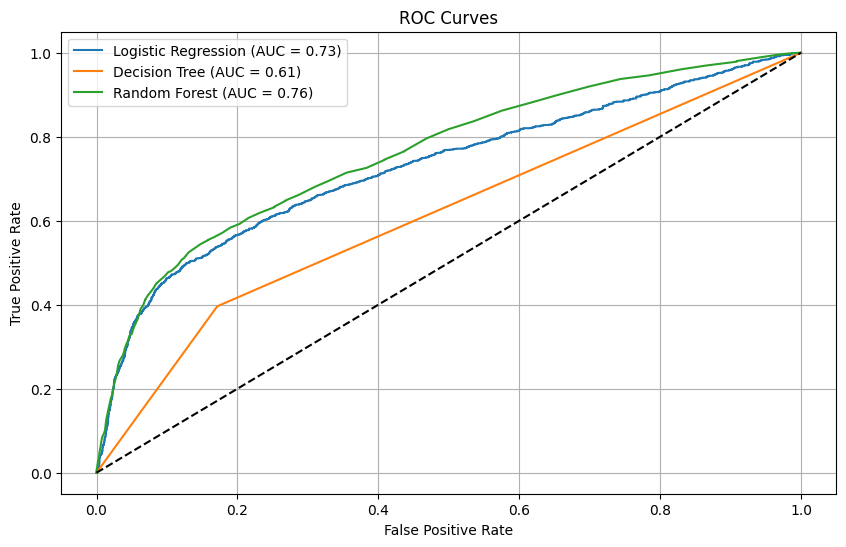

In [ ]:
plt.figure(figsize=(10, 6))
evaluate(lr, X_test, y_test, "Logistic Regression", scaled=True)
evaluate(dt, X_test, y_test, "Decision Tree")
evaluate(raf, X_test, y_test, "Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

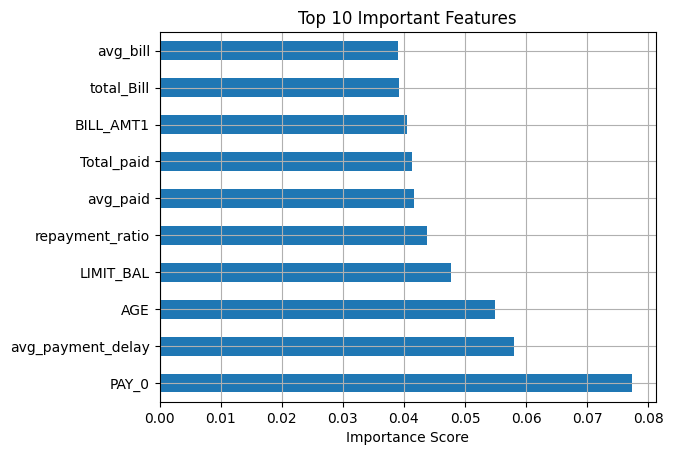

In [ ]:
importances = pd.Series(raf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.grid()
plt.show()